In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Functions import kNN as kNN
#load data
train_digits = pd.read_csv("data/mnist_train.csv")
test_digits = pd.read_csv("data/mnist_test.csv")
#convert pandas Data Frame to Numpy Array
train_array = train_digits.to_numpy()
test_array = test_digits.to_numpy()
# Datensatz hat 59999 Zeilen
train_array.shape

(59999, 785)

7


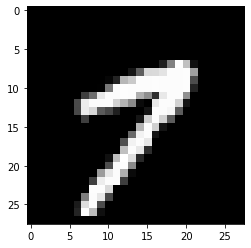

In [48]:
#show image 
def return_label(sample):
    return train_array[sample-1, 0]

def show_digit(sample):
    img = train_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

print(return_label(79))
show_digit(79)

In [ ]:
#compute average intensities of all rows describing the same number
#imshow as output
def avg_digit_img(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))
    
    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    #shape image
    avg.shape = (28,28)
    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #show image and colorbar
    plt.imshow(avg, 'gray')
    plt.colorbar()


In [ ]:
#compare sample image with averaged images pixel by pixel
#select digit with lowest difference in intensity (output)
def digit_recognition(sample):

    intensities_list = [] #will be filled with average intensity differences for each digit 
    sample_img = test_array[sample-1, 1:] #create array with intensity values of sample

    #subtract avg array from sample array and store as difference array (diff_arr)
    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        #turn difference array to difference list
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #sum all absolute values of difference list and assign to variable intensity_sum
        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))

In [70]:
#Intensitätsdifferenzen zwischen n-tem Pixel von allen Bildern aufaddieren
intensities_diff = np.zeros((1, 784))
for i in range(0, 10000):
    for j in range(0, 10000):
        if i != j:
            intensities_diff += np.sqrt((train_array[i, 1:785] - train_array[j, 1:785])**2)

#array in liste
intensities_diff_list = []
for k in range(0, 784):
    intensities_diff_list.append(intensities_diff[0, k])

#anteile jedes pixels berechnen
weighting_list = []
for m in range(0,784):
    weighting_list.append(intensities_diff_list[m]/sum(intensities_diff_list))


In [114]:
weight_train_array = np.zeros(train_array.shape)

for i in range(0, train_array.shape[0]):
    weight_train_array[i, 0] = train_array[i, 0]
    weight_train_array[i, 1:] = train_array[i, 1:]*weighting_list

print(train_array[0, :])
print(weight_train_array[0, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84
 252 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 163 252 252 252 253 252 252  96 189 253 16

In [ ]:

def digit_recognition(sample):

    intensities_list = [] #will be filled with average intensity differences for each digit 
    sample_img = test_array[sample-1, 1:] #create array with intensity values of sample

    #subtract avg array from sample array and store as difference array (diff_arr)
    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        #turn difference array to difference list
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #weight intensities differences
        diff_list_weight = np.multiply(diff_list, weighting_list)

        #sum all absolute values of difference list and assign to variable intensity_sum
        intensity_sum = 0
        for k in range(0, len(diff_list_weight)):
            diff_list_weight[k] = diff_list_weight[k]**2
            diff_list_weight[k] = np.sqrt(diff_list_weight[k])
            intensity_sum += diff_list_weight[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))

In [ ]:
#try out digit_recognition function
print(digit_recognition(12))
show_digit(12)
print(test_array[11,0]) #note: here we use the index and not the number of the digit

In [ ]:
#Überprüfung:
avg_list = []
for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    #die geht schneller weil nicht immer die durchschnitsarrays neu berechnet werden
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #weight intensities differences
        diff_list_weight = np.multiply(diff_list, weighting_list)

        #sum all absolute values of difference list and assign to variable intensity_sum
        intensity_sum = 0
        for k in range(0, len(diff_list_weight)):
            diff_list_weight[k] = diff_list_weight[k]**2
            diff_list_weight[k] = np.sqrt(diff_list_weight[k])
            intensity_sum += diff_list_weight[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))


true = 0
false = 0

for i in range(0, test_array.shape[0]):
    if digit_recognition_fast(i+1) == test_array[i, 0]:
        true += 1
    else:
        false += 1

print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#72,05 Prozent mit Durchschnittsdifferenz über die ersten 1000 Bilder
#72,06 Prozent mit Durchschnittsdifferenz über die ersten 10000 Bilder

In [136]:
# Verwendung durch Abfrage mit train_array und k = 1
def kNN(img, k=4, train = True):
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []
    dist = knn.distances(train_array, img)

    if train == True:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1:k+1]
    
    else:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0:k]

    
    for i in range(0, k):
        counter[train_array[k_smallest[i],0]] += 1

    for j in range(0, 9):
        if counter[j] == max(counter):
            max_indices.append(j)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        if train == True:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1]
        else:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0]
        return train_array[k_smallest,0]
        
        for i in range(0, len(max_indices)):
            if max_indices[i] == 9:
                return max_indices[i]
        
        for i in range(0, len(max_indices)):
            if max_indices[i] == 5:
                for i in range(0, len(max_indices)):
                    if max_indices[i] != 5:
                        return max_indices[i]

        if train == True:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1]
        else:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0]
        return train_array[k_smallest,0]

In [137]:
def validation_kNN_train(s_size, k=5):
    true = 0
    false = 0
    false_pred = []

    for i in range(0, s_size):
        result_kNN = kNN(train_array[29500 + i, 1:], k, train=True)
        if result_kNN == train_array[29500 + i, 0]:
            true += 1
        else:
            false += 1
            
    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')


In [2]:
import Functions.PCA as pca
from Functions.kNN import kNN

In [3]:
z_array, z_image = pca.z_transformation(train_array[:, 1:], test_array[3, 1:])

In [4]:
pca_arr, pca_img = pca.PCA(z_array, z_image, num_components=30)

In [8]:
kNN(pca_arr, pca_img, k = , train=False)

4

In [16]:
def kNN(PCs_arr, PCs_img, k, train = True):
   
   #Distance calculation
    arr_rows = PCs_arr.shape[0]
    img_dot = (PCs_img**2).sum(axis=0)*np.ones(shape=(1,arr_rows))
    arr_dot = (PCs_arr[:, :]**2).sum(axis=1)
    dist_arr =  np.sqrt(img_dot + arr_dot - 2*np.dot(PCs_img, PCs_arr[:, :].T))
    dist = dist_arr.tolist()[0]
    
    #Sorting
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []
    
    if train == True:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1:k+1]
    
    else:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0:k]

    
    for i in range(0, k):
        counter[train_array[k_smallest[i],0]] += 1

    for j in range(0, 9):
        if counter[j] == max(counter):
            max_indices.append(j)
            

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        if train == True:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1]
        else:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0]
        return train_array[k_smallest,0]

[1, 2, 3]

In [17]:
kNN(pca_arr, pca_img, k = 3, train=False)

4

In [10]:
def validation_kNN_test(s_size, k=5):
    true = 0
    false = 0

    for i in range(0, s_size):

        z_array, z_image = pca.z_transformation(train_array[:, 1:], test_array[i, 1:])
        pca_arr, pca_img = pca.PCA(z_array, z_image, num_components=30)


        result_kNN = kNN(pca_arr, pca_img, k = 5, train=False)
        if result_kNN == test_array[i, 0]:
            true += 1
        else:
            false += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')

In [12]:
validation_kNN_test(150)

Anzahl richtig erkannter Digits: 145
Anzahl falsch erkannter Digits: 5

Anteil richtiger Vorhersagen: 96.66666666666667%


In [138]:
#Idee zur weiteren Verbesserung: Schauen welche Zahlen am häufigsten fälschlicherweise vorhergesagt werden. Vergleich mit Durchschnittszahl. Gewichtung verschiedener Faktoren.

#Validation mit Trainingsdatensatz und k=1 bei mehreren Maxima (Zeile 29500 - 30500)
#k=1 -> 97,3%
#k=2 -> 97,3%
#k=3 -> 97,6%
#k=4 -> 97,6%
#k=5 -> 97,4%
#k=6 -> 97,2%
validation_kNN_train(1000, k = 4)
#97,4% mit -> if 9 elif 1 elif 2 -> kNN = 1
#97,7% mit -> if 9 elif 1 elif 2 -> kNN = 1 + Pixel-Gewichtung
#97,6% mit -> if 9 elif 5 -> kNN = 1 + Pixel-Gewichtung
#97,4% mit -> if 9 -> kNN = 1 + Pixel-Gewichtung
#97,4% mit -> kNN = 1 + Pixel-Gewichtung
#97,5% mit -> kNN = 1


Anzahl richtig erkannter Digits: 975
Anzahl falsch erkannter Digits: 25

Anteil richtiger Vorhersagen: 97.5%


In [104]:
len(false_pred)

NameError: name 'true' is not defined

In [125]:
#welche Zahlen wie oft nicht erkannt werden bei Train mit Pixelgewichtung, mit k=1 bei mehreren Maxima (Zeile 29500 - 30500)
# -> [2, 1, 1, 5, 1, 2, 0, 4, 1, 6]
counter = [0,0,0,0,0,0,0,0,0,0]
for i in range(0, len(false_ind)):
    j = false_ind[i]
    counter[j] += 1
print(counter)

#welche Zahlen wie oft fälschlicherweise berechnet werden bei Train mit Pixelgewichtung, mit k=1 bei mehreren Maxima (Zeile 29500 - 30500)
# -> [1, 3, 3, 2, 3, 6, 2, 2, 1, 0]
counter = [0,0,0,0,0,0,0,0,0,0]
for i in range(0, len(false_pred)):
    j = false_pred[i]
    counter[j] += 1
print(counter)

#interessant sind hier vor allem die Zahlen bei denen es starke Abweichungen gibt. Also besonders 5 und 9. -> if 9 elif 5 -> kNN = 1

[1, 106, 3, 2, 3, 4, 1, 2, 1, 0]
[1, 3, 3, 2, 3, 6, 2, 2, 1, 0]


x = np.array([[1,2,3],[3,2,5],[9,0,2]])
print(x)
min1 = np.argwhere(x == np.min(x[:,0]))
min2 = min1[0]
min2